In [7]:
import pandas as pd

tab = pd.read_csv('times.csv')

### 1. rozszerz funkcję julia_line(k), tak aby wypisywała ona czas obliczen dla linii, rank procesu oraz numer linii.
> Zrobione
### 2. sprawdz czy czasy różnią się w zależności od numeru linii, policz róznicę między największym, a najmniejszym czasem

In [12]:
t_max = tab['czas'].max()
t_min = tab['czas'].min()

print(f'time diff: {t_max-t_min}')

time diff: 0.09612250328063965


### 3. sprawdz, w jaki sposób linie są przyporządkowywane do procesów - czy można powiedzieć że jest to podział blokowy albo cykliczny?

<AxesSubplot:xlabel='linia', ylabel='rank'>

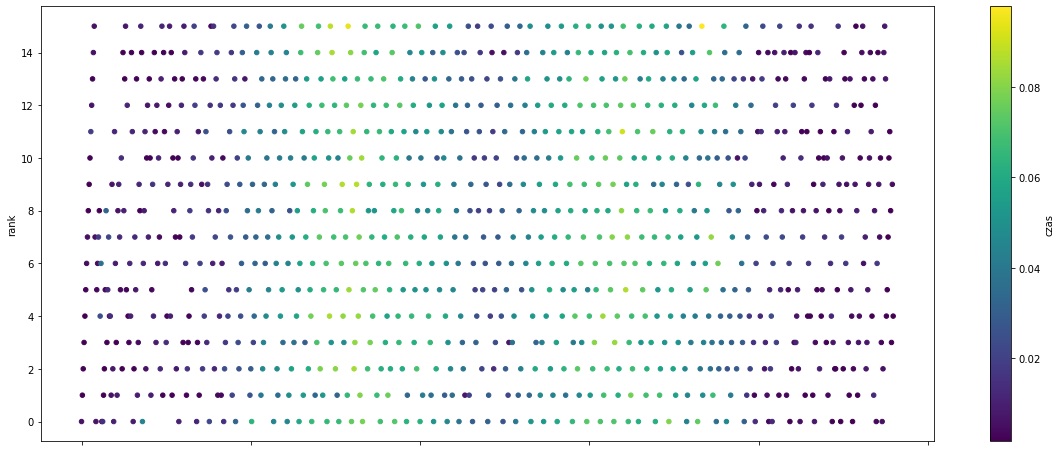

In [31]:
tab.plot.scatter(x='linia', y='rank', c='czas', colormap='viridis', figsize=(20, 8))

print("Podział jest bardziej zbliżony do cyklicznego")

### 4. porownaj liczbę linii przyporządkowaną do każdego z procesów workerów

Liczba linii przyporządkowana do każdego z procesów workerów jest zbliżona


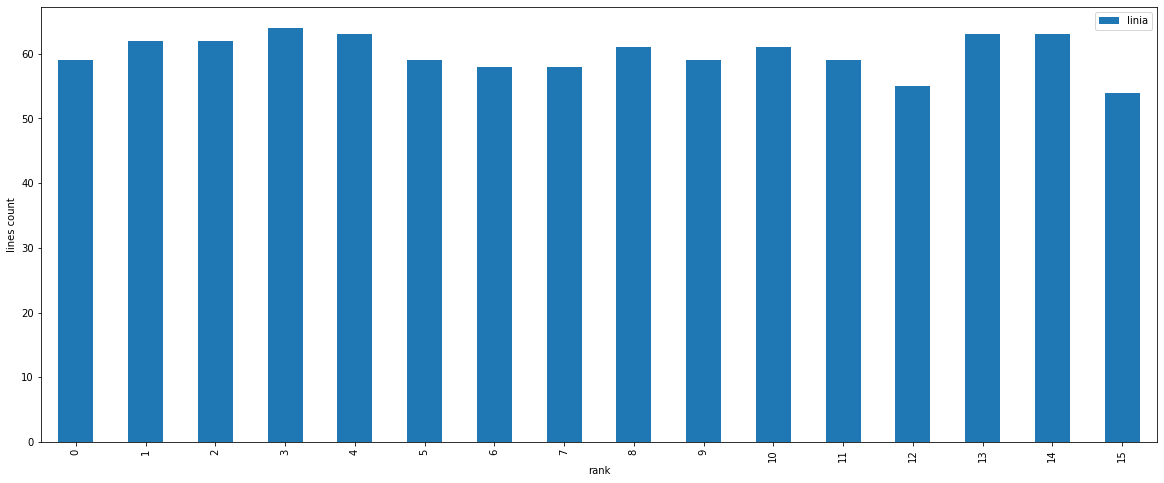

In [62]:
g = tab[['rank', 'linia']].groupby('rank').agg('count').plot.bar(figsize=(20, 8))
g.set_ylabel('lines count')

print("Liczba linii przyporządkowana do każdego z procesów workerów jest zbliżona")

### 5. Policz sumę czasów dla każdego z procesów workerów. Porównaj te czasy do siebie oraz do czasu działania całego programu.

Czas wykonania całego programu: 4.091747045516968


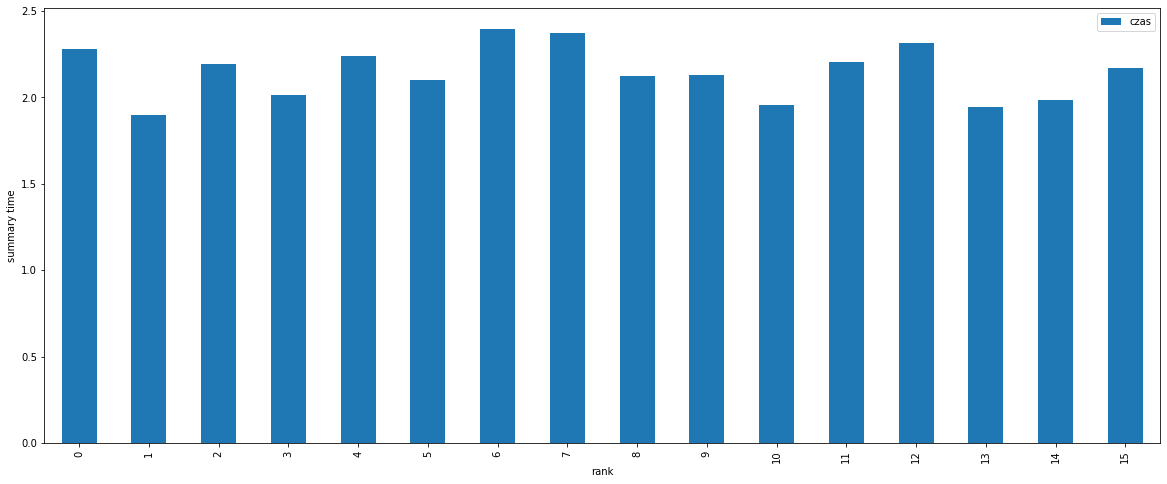

In [61]:
g = tab[['rank', 'czas']].groupby('rank').agg('sum').plot.bar(figsize=(20, 8))
g.set_ylabel('summary time')

all_time = 4.091747045516968

print(f'Czas wykonania całego programu: {all_time}')

### 6. Obciąż sztucznie obliczenia dla jednej wybranej linii dodając dodatkowe obliczenia w zależności od jej numeru (np. jeśli linia ma nr 1 wykonujemy  funkcję fft() od losowej dużej tablicy.) Wcześniej należy sprawdzić, że czas wykonania "nadmiarowego kodu" jest porónywalny lub większy z sumą czasów dla jednego z workerów obliczoną z p.4 . Sprawdz co się stało wykonując jeszcze raz polecenia 4 i 5

In [85]:
tab = pd.read_csv('times_fft.csv')

In [86]:
print(f"Najdłużej wykonywała sie linia:")
print(tab[tab['czas']==tab['czas'].max()])

Najdłużej wykonywała sie linia:
         czas  rank  linia
959  4.750218     0      0


##### 3_2. sprawdz, w jaki sposób linie są przyporządkowywane do procesów - czy można powiedzieć że jest to podział blokowy albo cykliczny?

Podział jest bardziej zbliżony do cyklicznego


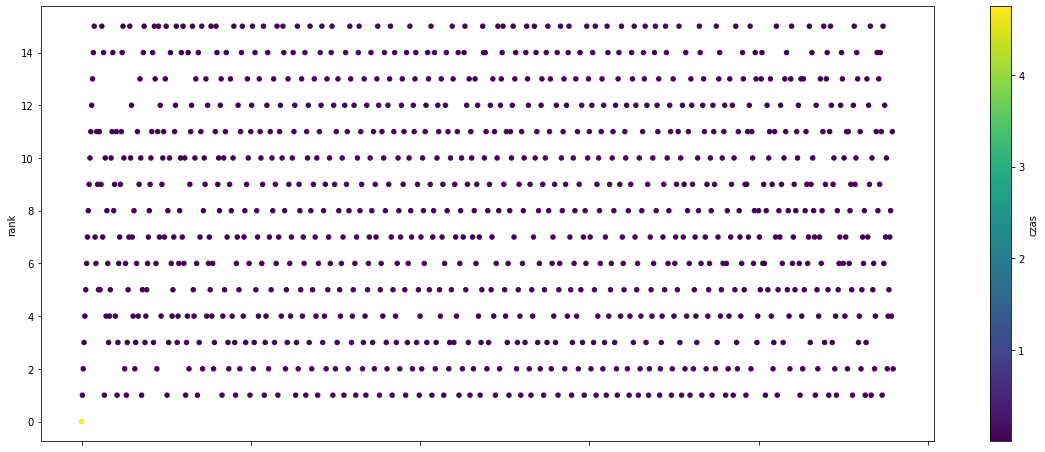

In [87]:
tab.plot.scatter(x='linia', y='rank', c='czas', colormap='viridis', figsize=(20, 8))

print("Podział jest bardziej zbliżony do cyklicznego")

##### 4_2. porownaj liczbę linii przyporządkowaną do każdego z procesów workerów

Liczba linii przyporządkowana do każdego z procesów workerów jest zbliżona


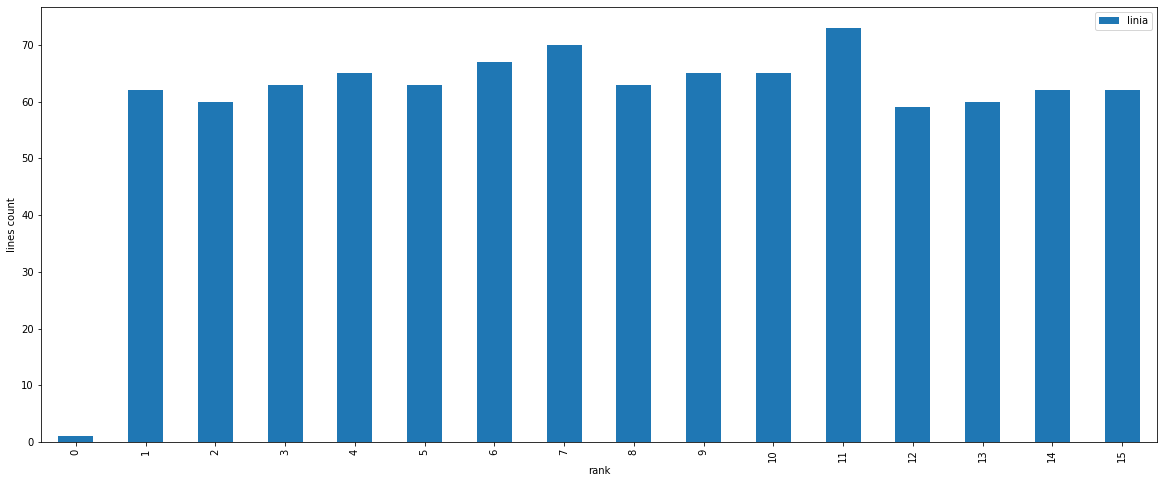

In [88]:
g = tab[['rank', 'linia']].groupby('rank').agg('count').plot.bar(figsize=(20, 8))
g.set_ylabel('lines count')

print("Liczba linii przyporządkowana do każdego z procesów workerów jest zbliżona")

##### 5_2. Policz sumę czasów dla każdego z procesów workerów. Porównaj te czasy do siebie oraz do czasu działania całego programu.

Czas wykonania fft: 2.467587471008301
Czas wykonania całego programu: 4.83270788192749


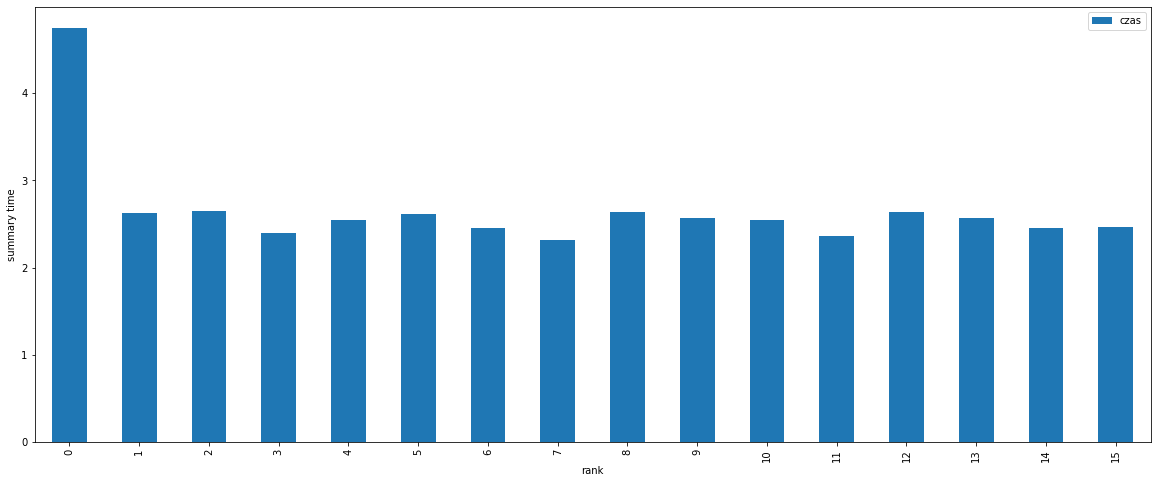

In [89]:
g = tab[['rank', 'czas']].groupby('rank').agg('sum').plot.bar(figsize=(20, 8))
g.set_ylabel('summary time')

all_time = 4.83270788192749
fft_time = 2.467587471008301
print(f'Czas wykonania fft: {fft_time}')
print(f'Czas wykonania całego programu: {all_time}')